## 1. Import Necessary Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


## 2. Load Data


In [2]:
df = pd.read_csv("../datasets/Flights_2021/final_dataset-add.csv")

In [3]:
df.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operating_Airline,OriginAirportID,...,dew_point_2m,precipitation,rain,snowfall,weather_code,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_direction_100m
0,0,2021,1,1,5,2,2021-01-05,DL,9E,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
1,1,2021,1,1,5,2,2021-01-05,AA,AA,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
2,2,2021,1,1,5,2,2021-01-05,DL,DL,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
3,3,2021,1,1,5,2,2021-01-05,NK,NK,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
4,4,2021,1,1,6,3,2021-01-06,DL,9E,11298,...,13.781,1.4,1.4,0.0,61.0,991.41290,100.0,15.463244,192.094740,196.389620


In [4]:
df.shape

(538040, 37)

In [6]:
df.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [7]:
df.describe()


,Unnamed: 0,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelayMinutes,...,dew_point_2m,precipitation,rain,snowfall,weather_code,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,day_of_year
count,538040.000000,538040.0,538040.000000,538040.000000,538040.000000,538040.000000,538040.000000,538040.00000,538040.000000,538040.000000,...,538040.000000,538040.000000,538040.000000,538040.000000,538040.000000,538040.000000,538040.000000,538040.000000,538040.000000,538040.000000
mean,269019.500000,2021.0,2.630375,6.902132,15.760761,12972.293434,12972.580626,1307.97171,1310.751308,12.743173,...,7.461657,0.105601,0.101274,0.003036,8.048433,972.580672,37.118769,11.569397,182.953720,194.445013
std,155318.913755,0.0,1.076698,3.295826,8.786565,1444.908327,1444.710204,490.99468,504.431834,44.962162,...,9.717025,0.632887,0.629477,0.043737,18.560099,59.911195,37.189578,6.446033,94.446916,100.717629
min,0.000000,2021.0,1.000000,1.000000,1.000000,10821.000000,10821.000000,3.00000,1.000000,0.000000,...,-27.149000,0.000000,0.000000,0.000000,0.000000,811.036560,0.000000,0.000000,0.561692,1.000000
25%,134509.750000,2021.0,2.000000,4.000000,8.000000,11298.000000,11298.000000,900.00000,901.000000,0.000000,...,0.392000,0.000000,0.000000,0.000000,0.000000,975.921300,0.900000,6.877789,108.435040,112.000000
50%,269019.500000,2021.0,3.000000,7.000000,16.000000,12892.000000,12892.000000,1305.00000,1311.000000,0.000000,...,8.387500,0.000000,0.000000,0.000000,1.000000,996.037430,26.100000,10.239453,192.528800,199.000000
75%,403529.250000,2021.0,4.000000,10.000000,23.000000,14107.000000,14107.000000,1720.00000,1730.000000,7.000000,...,14.904500,0.000000,0.000000,0.000000,3.000000,1009.436340,72.300000,15.175612,253.072400,280.000000
max,538039.000000,2021.0,4.000000,12.000000,31.000000,14869.000000,14869.000000,2359.00000,2400.000000,2692.000000,...,27.276000,47.400000,47.400000,3.010000,75.000000,1037.471000,100.000000,49.576847,360.000000,365.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538040 entries, 0 to 538039
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 538040 non-null  int64  
 1   Year                       538040 non-null  int64  
 2   Quarter                    538040 non-null  int64  
 3   Month                      538040 non-null  int64  
 4   DayofMonth                 538040 non-null  int64  
 5   DayOfWeek                  538040 non-null  int64  
 6   FlightDate                 538040 non-null  object 
 7   Marketing_Airline_Network  538040 non-null  object 
 8   Operating_Airline          538040 non-null  object 
 9   OriginAirportID            538040 non-null  int64  
 10  Origin                     538040 non-null  object 
 11  DestAirportID              538040 non-null  int64  
 12  Dest                       538040 non-null  object 
 13  CRSDepTime                 53

## 3. Exploratory Data Analysis

#### Encoding 

In [8]:
df.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operating_Airline,OriginAirportID,...,dew_point_2m,precipitation,rain,snowfall,weather_code,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_direction_100m
0,0,2021,1,1,5,2,2021-01-05,DL,9E,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
1,1,2021,1,1,5,2,2021-01-05,AA,AA,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
2,2,2021,1,1,5,2,2021-01-05,DL,DL,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
3,3,2021,1,1,5,2,2021-01-05,NK,NK,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
4,4,2021,1,1,6,3,2021-01-06,DL,9E,11298,...,13.781,1.4,1.4,0.0,61.0,991.41290,100.0,15.463244,192.094740,196.389620


In [10]:
categorical_columns = df.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [11]:
df.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,...,precipitation,rain,snowfall,weather_code,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,date,day_of_year
0,0,2021,1,1,5,4,11298,3,11433,4,...,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,4,5
1,1,2021,1,1,5,4,11298,3,11057,1,...,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,4,5
2,2,2021,1,1,5,4,11298,3,12892,6,...,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,4,5
3,3,2021,1,1,5,4,11298,3,11433,4,...,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,4,5
4,4,2021,1,1,6,5,11298,3,11433,4,...,1.4,1.4,0.0,61.0,991.41290,100.0,15.463244,192.094740,5,6


In [12]:
df = df.drop("Unnamed: 0", axis = 1)
df = df.drop("Year", axis = 1)
# df = df.drop("ArrDelayMinutes", axis = 1)
# df = df.drop("ArrTime", axis = 1)
# df = df.drop("ArrDel15", axis = 1)
# df = df.drop("Year", axis = 1)
# df = df.drop("ArrDel15", axis = 1)

In [13]:
# Example: Creating a squared feature
df['daymonth'] = df['day_of_year'] ** 14


<Axes: >

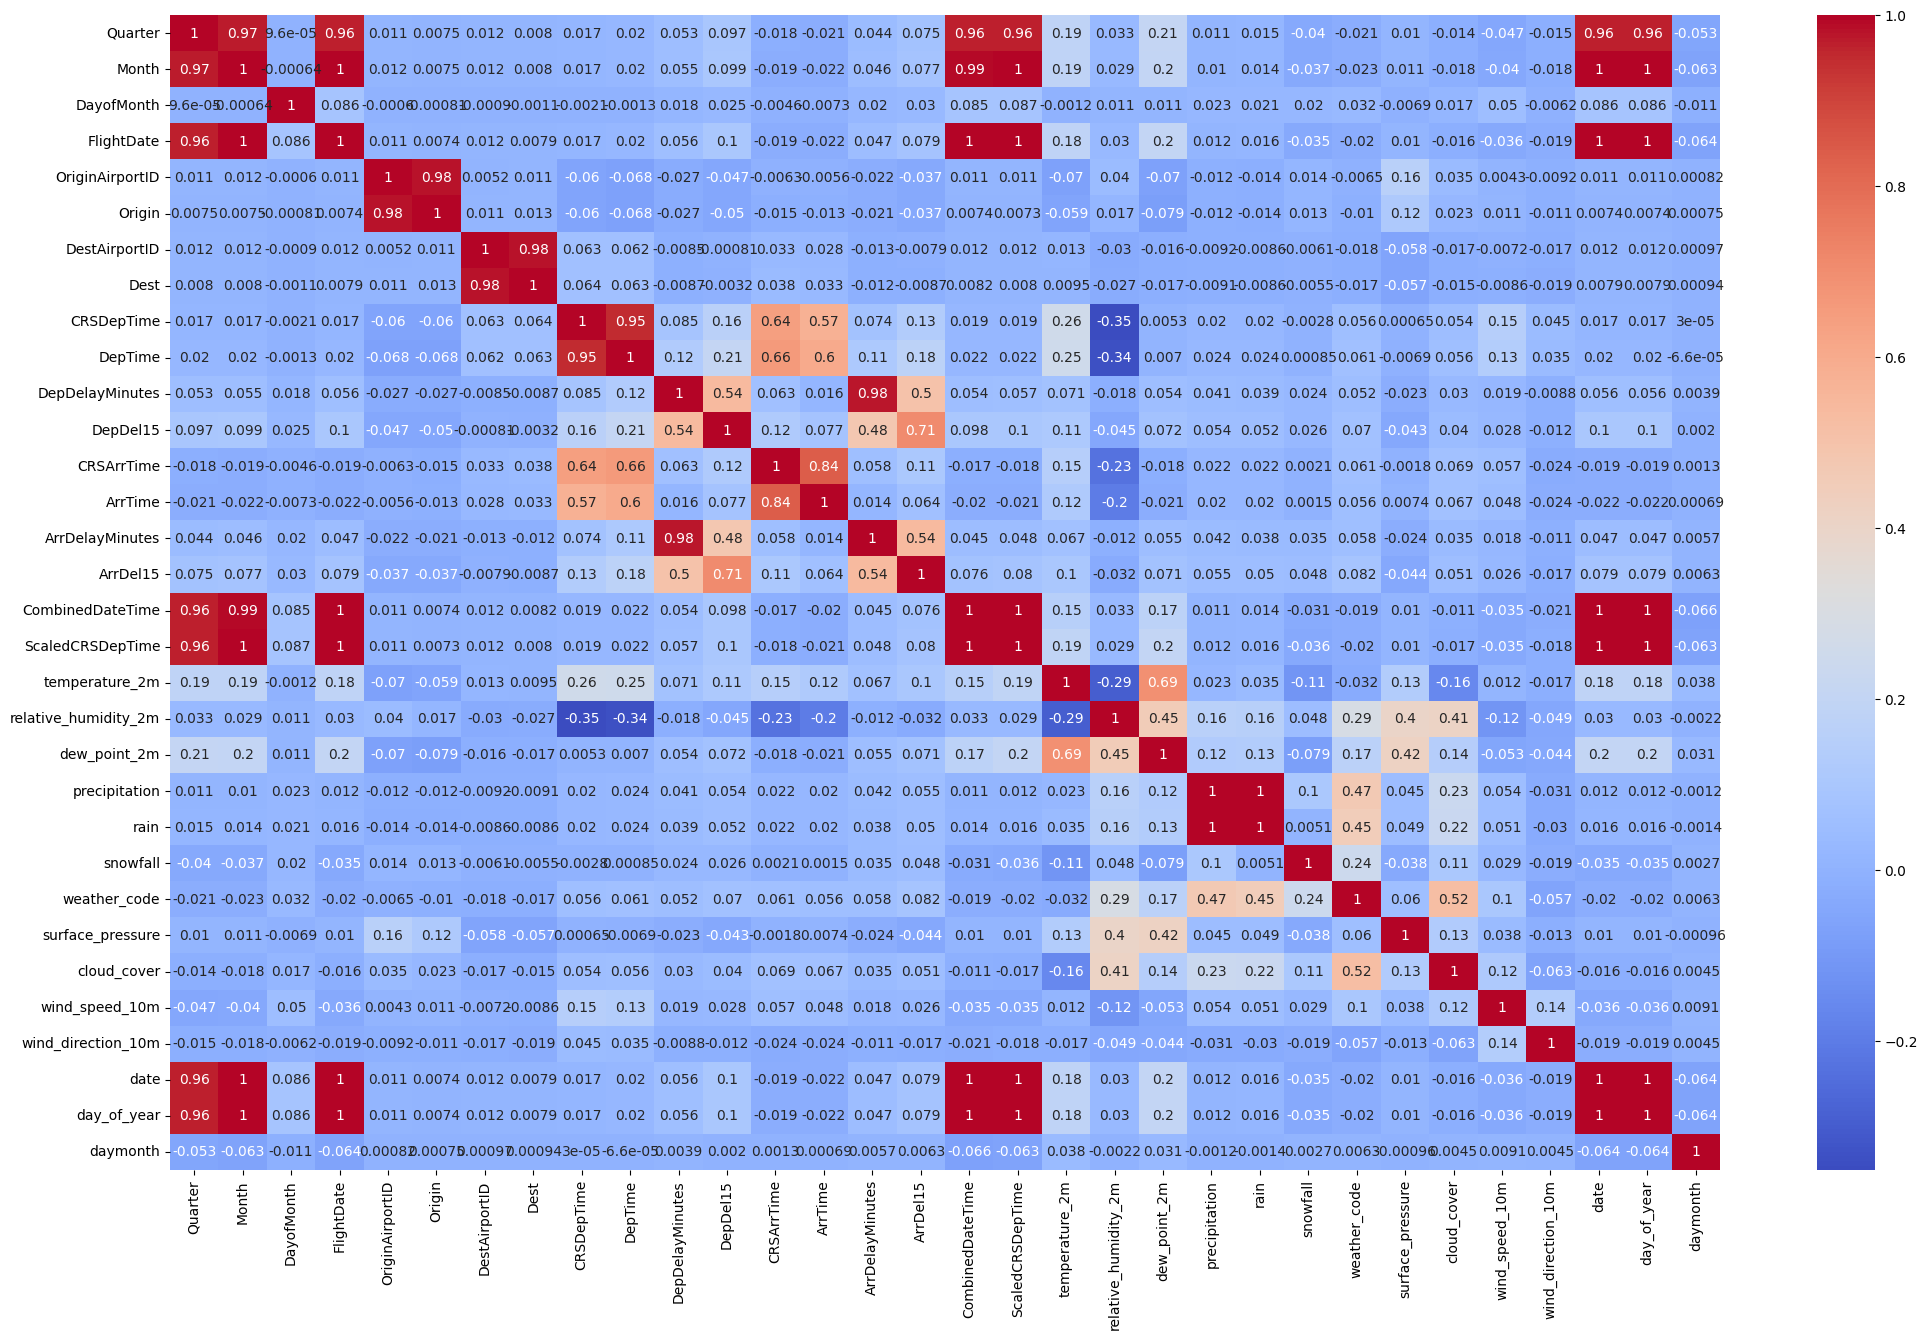

In [14]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix), k=1)

plt.figure(figsize= (25,15))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538040 entries, 0 to 538039
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Quarter               538040 non-null  int64  
 1   Month                 538040 non-null  int64  
 2   DayofMonth            538040 non-null  int64  
 3   FlightDate            538040 non-null  int32  
 4   OriginAirportID       538040 non-null  int64  
 5   Origin                538040 non-null  int32  
 6   DestAirportID         538040 non-null  int64  
 7   Dest                  538040 non-null  int32  
 8   CRSDepTime            538040 non-null  int64  
 9   DepTime               538040 non-null  float64
 10  DepDelayMinutes       538040 non-null  float64
 11  DepDel15              538040 non-null  float64
 12  CRSArrTime            538040 non-null  int64  
 13  ArrTime               537991 non-null  float64
 14  ArrDelayMinutes       536982 non-null  float64
 15  

In [16]:
# import ppscore as pps

# # before using pps, let's drop country and year
# dfcopy = df.copy()
# # dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

# matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# #plot
# plt.figure(figsize = (15,8))
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4. Feature Engineering

#### 4.1 Feature Selection 

In [17]:
df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'FlightDate', 'OriginAirportID',
       'Origin', 'DestAirportID', 'Dest', 'CRSDepTime', 'DepTime',
       'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'CombinedDateTime', 'ScaledCRSDepTime',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'rain', 'snowfall', 'weather_code', 'surface_pressure',
       'cloud_cover', 'wind_speed_10m', 'wind_direction_10m', 'date',
       'day_of_year', 'daymonth'],
      dtype='object')

In [11]:
df.sample(2)

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operating_Airline,OriginAirportID,...,dew_point_2m,precipitation,rain,snowfall,weather_code,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_direction_100m
361247,361247,2021,3,9,24,5,2021-09-24,UA,G7,13930,...,6.2955,0.0,0.0,0.0,0.0,990.5015,0.000000,14.154915,262.69434,268.6361
198036,198036,2021,2,6,28,1,2021-06-28,WN,WN,14869,...,6.3920,0.0,0.0,0.0,1.0,873.9290,24.900002,11.013882,78.69010,90.0000


In [10]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Marketing_Airline_Network', 'Operating_Airline ',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'TaxiIn', 'CRSArrTime',
       'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'DistanceGroup',
       'CombinedDateTime', 'ScaledCRSDepTime', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'rain',
       'snowfall', 'weather_code', 'surface_pressure', 'cloud_cover',
       'wind_speed_10m', 'wind_direction_10m', 'wind_direction_100m'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
X = df[['Origin', 'Dest', 'rain','Year','Quarter','Month','DayOfWeek','Marketing_Airline_Network','']]

#y is simply the life expectancy col
y = df["DepDel15"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [21]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (376628, 4)
Shape of X_test:  (161412, 4)
Shape of y_train:  (376628,)
Shape of y_test:  (161412,)


In [22]:
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [23]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [28]:

from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 

lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
sv = SVC(random_state=999)

models = [lr, rf, sv]

from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 3, shuffle = True, random_state=999)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy


Scores:  [0.8199581  0.81920935 0.81917605] - Scores mean:  0.819447836401479 - Scores std (lower better):  0.0003610683168238708
Scores:  [0.79231817 0.79263679 0.79105001] - Scores mean:  0.7920016542804914 - Scores std (lower better):  0.0006853725005771084
Scores:  [0.8201652  0.81929697 0.81937519] - Scores mean:  0.8196124551619476 - Scores std (lower better):  0.0003921534608008397


In [35]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=999)  #<----this is the model I choose, after cross validation
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']  #this is listed in the sklearn website

#refit means it will pick the best model, and fit again, so it means grid is already the best model after this line
grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=kfold, refit=True, return_train_score=True)
#scoring = f1, recall, precision, accuracy

grid.fit(X_train, y_train)  #remember to use only training set here....


print(grid.cv_results_)

{'mean_fit_time': array([0.33298993, 0.07451789, 0.14290905]), 'std_fit_time': array([0.03222326, 0.00283002, 0.00517532]), 'mean_score_time': array([0.01083692, 0.0090003 , 0.00984009]), 'std_score_time': array([2.24626306e-03, 4.68418186e-06, 6.33207350e-04]), 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'liblinear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'solver': 'newton-cg'}, {'solver': 'lbfgs'}, {'solver': 'liblinear'}], 'split0_test_score': array([0.8199581, 0.8199581, 0.8199581]), 'split1_test_score': array([0.81920935, 0.81920935, 0.81920935]), 'split2_test_score': array([0.81917605, 0.81917605, 0.81917605]), 'mean_test_score': array([0.81944784, 0.81944784, 0.81944784]), 'std_test_score': array([0.00036107, 0.00036107, 0.00036107]), 'rank_test_score': array([1, 1, 1]), 'split0_train_score': array([0.81916881, 0.81916881, 0.81916881]), 'split1_train_score': array([0.8195631, 0.8195631, 0.8195631]), 's

In [38]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# #if you want all in one table
# from sklearn.metrics import classification_report

# #if you want the confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# #format (ytrue, ypred)
# print(accuracy_score(y, ypred))
# print(precision_score(y, ypred))
# print(recall_score(y, ypred))
# print(f1_score(y, ypred))

# print(classification_report(y, ypred))

# cm = confusion_matrix(y, ypred)
# cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

# cmp.plot()

# #for regression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Accuracy: 0.818470745669467
Precision: 0.4
Recall: 0.0015027835650124662
F1 Score: 0.0029943176018238115
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    132133
         1.0       0.40      0.00      0.00     29279

    accuracy                           0.82    161412
   macro avg       0.61      0.50      0.45    161412
weighted avg       0.74      0.82      0.74    161412



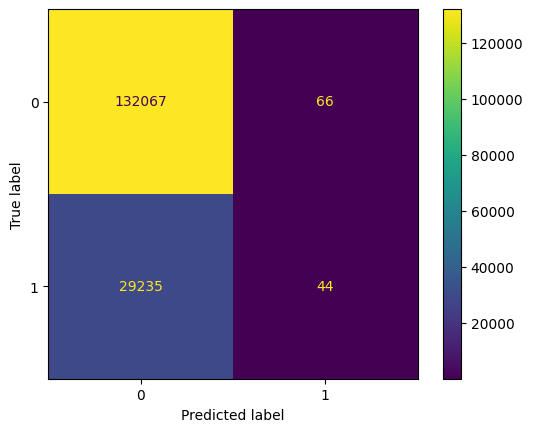

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#if you want all in one table
from sklearn.metrics import classification_report

#if you want the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#format (ytrue, ypred)
print("Accuracy:" ,accuracy_score(y_test, yhat)),
print("Precision:", precision_score(y_test, yhat)),
print("Recall:" ,recall_score(y_test, yhat)),
print("F1 Score:", f1_score(y_test, yhat)),

print(classification_report(y_test, yhat))

cm = confusion_matrix(y_test, yhat)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

cmp.plot()

#for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Testing:

In [37]:
import pickle

# save the model
filename = '../model/model.pkl' # pkl does not matter, you can do .everything
pickle.dump(grid, open(filename,'wb'))


In [41]:
print("Length of y:", len(y))
print("Length of y_test:", len(y_test))


Length of y: 538040
Length of y_test: 161412


In [39]:
print("Original y shape:", y.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Original y shape: (538040,)
y_train shape: (376628,)
y_test shape: (161412,)


# Inference

In [50]:
import pickle
import pandas as pd
import numpy as np

# Load the pre-trained machine learning model for predicting car selling prices
model = pickle.load(open("../model/logistic.pkl", "rb"))

# Create a sample data point for prediction with two features: "max_power" and "engine"
sample = {
    "day_of_year": [10],
    "Origin": [2],  
    "Dest": [2],
    "rain": [2]
}

# Convert the sample data into a Pandas DataFrame for processing
sample_df = pd.DataFrame(sample)

# Use the pre-trained model to predict the selling price of the car
predicted_delay  = model.predict(sample_df)

# Reverse the log transformation applied during training to obtain the final predicted selling price

# Print the predicted selling price of the car model
print((predicted_delay[0]))


1.0


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
X = df[        ['day_of_year', 'Origin', 'Dest', 'rain']        ]

#y is simply the life expectancy col
y = df["DepDel15"]